In [1]:
from keras.models import Model
from keras.layers import Input, Dense

In [3]:
encoding_dim = 32 #size of encoded representation
input_img = Input(shape=(784,))  #28*28 for mnist images
#encoded is the encoded representation of input
encoded = Dense(encoding_dim, activation="relu")(input_img)
#decoded is the  lossy reconstruction of the input
decoded = Dense(784, activation="relu")(encoded)

autoencoder = Model(input_img, decoded)

In [4]:
#creating an encoder
encoder = Model(input_img, encoded)

In [5]:
#creating an decoder
encoder_input = Input(shape=(encoding_dim,))
#taking the last layer of autoencoder 
decoder_layer = autoencoder.layers[-1]
#create the decoder
decoder = Model(encoder_input, decoder_layer(encoder_input))

In [6]:
autoencoder.compile(optimizer="adadelta",loss="binary_crossentropy")

# Datasets

In [9]:
from keras.datasets import mnist
import numpy as np

In [10]:
(x_train,_), (x_test,_) =  mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [11]:
#We will normalize all values between 0 and 1 and we will 
x_train = x_train.astype('float32') / 155
x_test = x_test.astype('float32') / 155

In [13]:
print(x_train.shape)

(60000, 28, 28)


In [14]:
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Train the autoencoder

In [15]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 6ms/step - loss: 1.9484 - val_loss: 1.9712
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 1.9426 - val_loss: 1.9661
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 1.9378 - val_loss: 1.9612
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 1.9331 - val_loss: 1.9563
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 1.9282 - val_loss: 1.9515
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 1.9234 - val_loss: 1.9467
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 1.9184 - val_loss: 1.9414
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 1.9135 - val_loss: 1.9364
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 1.9085 - val_loss: 1.9314
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 1.9037 - val_loss: 1.9264

In [16]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

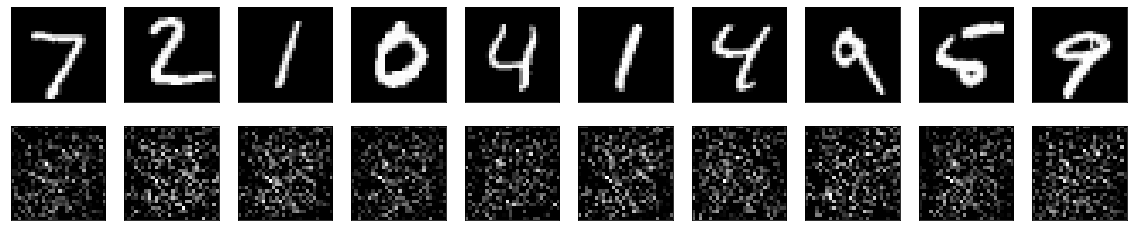

In [17]:
import matplotlib.pyplot as plt
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
 # display original
 ax = plt.subplot(2, n, i + 1)
 plt.imshow(x_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 # display reconstruction
 ax = plt.subplot(2, n, i + 1 + n)
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()